Лучший найденный маршрут: C  A  B  D  E  C
Длина маршрута: 20.75854501823086


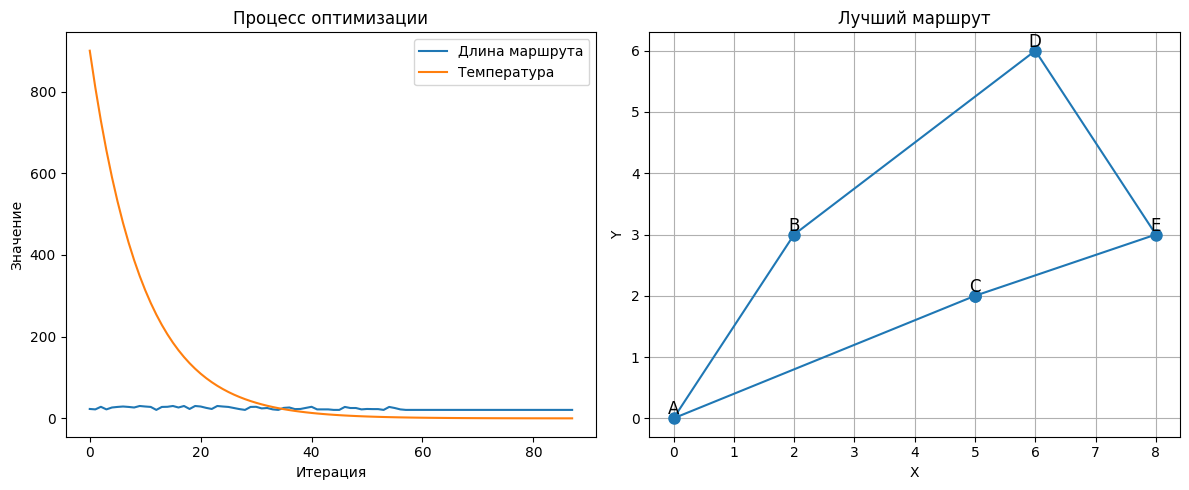

In [15]:
import math
import random
import matplotlib.pyplot as plt

# Координаты городов
# Les coordonne comme indique sur le devoir
cities = {
    'A': (0, 0),
    'B': (2, 3),
    'C': (5, 2),
    'D': (6, 6),
    'E': (8, 3)
}

# Функция для вычисления расстояния между двумя городами
# Calcul des coordonner entre deux routes
def distance(city1, city2):
    x1, y1 = cities[city1]
    x2, y2 = cities[city2]
    return math.sqrt((x2 - x1)**2 + (y2 - y1)**2)

# вычисления длины всего маршрута
# La fonction pour calculer le total de la distance
def route_length(route):
    total = 0
    for i in range(len(route)):
        total += distance(route[i], route[(i+1)%len(route)])
    return total

# Генерация соседнего решения (перестановка двух случайных городов)
# Avoir le voisin de 
def get_neighbor(route):
    new_route = route.copy()
    i, j = random.sample(range(len(new_route)), 2)
    new_route[i], new_route[j] = new_route[j], new_route[i]
    return new_route

# Алгоритм симуляции отжига
# Algorithme general de simulation
# les parametres de la fonction comme cooling rate comment la temperature baisse
# Les cites disponible pour faire la route
def simulated_annealing(cities, initial_temp=1000, alpha=0.9, min_temp=0.1, max_iterations=10000):
    # Начальный маршрут
    current_route = list(cities.keys())

    random.shuffle(current_route)
    current_length = route_length(current_route)
    
    best_route = current_route.copy()
    best_length = current_length
    # initialisation du temps de route
    time = initial_temp
    iteration = 0
    
    lengths_history = []
    temps_history = []
    
    while time > min_temp and iteration < max_iterations:
        # Генерация соседнего решения
        neighbor = get_neighbor(current_route)
        neighbor_length = route_length(neighbor)
        
        # Разница в длине
        #Calcul la variation delta pour entre deux route
        delta = neighbor_length - current_length
        # формула 
        formule = math.exp(-delta / time)
        # Принимаем ли новое решение?
        if delta < 0 or random.random() < formule:
            current_route = neighbor
            current_length = neighbor_length
            
            # Обновляем лучшее решение, если найдено
            if current_length < best_length:
                best_route = current_route.copy()
                best_length = current_length
        
        # Охлаждение
        time *= alpha
        iteration += 1
        
        # Сохраняем историю для визуализации
        lengths_history.append(current_length)
        temps_history.append(time)
    
    return best_route, best_length, lengths_history, temps_history

# Запуск алгоритма
best_route, best_length, lengths_history, temps_history = simulated_annealing(cities)

print("Лучший найденный маршрут:", '  '.join(best_route + [best_route[0]]))
print("Длина маршрута:", best_length)

# Визуализация
plt.figure(figsize=(12, 5))

# График изменения длины маршрута и температуры
plt.subplot(1, 2, 1)
plt.plot(lengths_history, label='Длина маршрута')
plt.plot(temps_history, label='Температура')
plt.xlabel('Итерация')
plt.ylabel('Значение')
plt.title('Процесс оптимизации')
plt.legend()

# Визуализация маршрута
plt.subplot(1, 2, 2)
route = best_route + [best_route[0]]
x = [cities[city][0] for city in route]
y = [cities[city][1] for city in route]

plt.plot(x, y, 'o-', markersize=8)
for city, (xi, yi) in cities.items():
    plt.text(xi, yi, city, fontsize=12, ha='center', va='bottom')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Лучший маршрут')
plt.grid(True)
plt.tight_layout()
plt.show()

